In [1]:
import gymnasium as gym
import time
import keyboard
env=gym.make("FrozenLake-v1",render_mode='human')
env.reset()
env.render()
# format of returnValue is (observation,reward, terminated, truncated, info)
# observation (object)  - observed state
# reward (float)        - reward that is the result of taking the action
# terminated (bool)     - is it a terminal state
# truncated (bool)      - it is not important in our case
# info (dictionary)     - in our case transition probability
print(env)
print('Initial state of the system')
print("transistion matrix from S0 and using action a1",env)
numberOfIterations=30
 
for i in range(numberOfIterations):
    randomAction= env.action_space.sample()
    returnValue=env.step(randomAction)
    env.render()
    print('Iteration: {}, action {}, nextstate{} '.format(i+1,randomAction,  returnValue[0]))
    print('list:',returnValue)
    time.sleep(2), 
    if returnValue[2]:
        break

y=(input('enter your character'))
#if keyboard.is_pressed('q'):
if 113==ord(y):
 print("End Display")
env.close()    

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>
Initial state of the system
transistion matrix from S0 and using action a1 <TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>
Iteration: 1, action 1, nextstate4 
list: (4, 0.0, False, False, {'prob': 0.3333333333333333})
Iteration: 2, action 3, nextstate4 
list: (4, 0.0, False, False, {'prob': 0.3333333333333333})
Iteration: 3, action 1, nextstate5 
list: (5, 0.0, True, False, {'prob': 0.3333333333333333})


TypeError: ord() expected a character, but string of length 0 found

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

env=gym.make("FrozenLake-v1",render_mode='human')
env.reset()
env.render()
env = env.unwrapped

# select the discount factor
discountFactor=0.9
# initialize the value function vector
valueFunctionVector=np.zeros(env.observation_space.n)
# maximum number of iterations
maxNumberOfIterations=500
# convergence threshold
convergenceTolerance=10**(-3)
policyProba=0.25
# convergence list 
convergenceList=[]

 
for iterations in range(maxNumberOfIterations):
    print("iteration number:",iterations)
    valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
    convergenceList.append(np.linalg.norm(vvalueFunctionVectorNextIterationalueFunctionVectorNextIteration-valueFunctionVector,2))
    #convergenceList.append(np.sqrt(np.sum(np.square(valueFunctionVectorNextIteration-valueFunctionVector))))
    for state in env.P:
        outerSum=0
        for action in env.P[state]:
            innerSum=0
            for probability, nextState, reward, isTerminalState in env.P[state][action]:
                #print(probability, nextState, reward, isTerminalState)
                innerSum=innerSum+ probability*(reward+discountFactor*valueFunctionVector[nextState])
            outerSum=outerSum+policyProba*innerSum
        valueFunctionVectorNextIteration[state]=outerSum
    if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
        valueFunctionVector=valueFunctionVectorNextIteration
        print('Convergence ensured')
        break
    valueFunctionVector=valueFunctionVectorNextIteration    

env.close()
print("finished training")

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
Convergence ensured
finished training


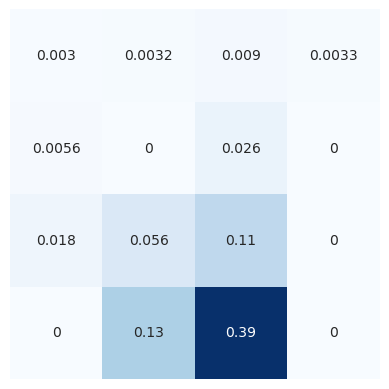

convergence of the value policy evaluation [np.float64(0.0), np.float64(0.25), np.float64(0.31641300147117846), np.float64(0.3615079029111085), np.float64(0.3868647052535271), np.float64(0.4036073603096215), np.float64(0.4136970440798369), np.float64(0.4202251604040234), np.float64(0.4242742821788016), np.float64(0.4268807863843915), np.float64(0.42852807212620203)]


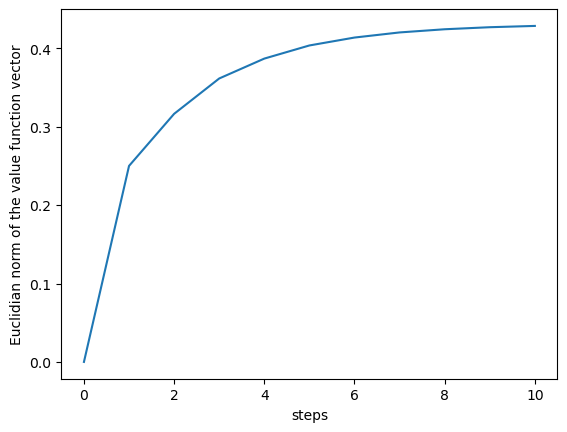

: 

In [ ]:
# visualize the state values
def DisplayGrid(valueFunction,reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(reshapeDim,reshapeDim),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.savefig('ValueImg.png',dpi=600)
    plt.show()
     
DisplayGrid(valueFunctionVector,4)

print("convergence of the value policy evaluation",convergenceList)
print("convergence of the value policy evaluation",convergenceList)
 
plt.plot(convergenceList)
plt.xlabel('steps')
plt.ylabel('Euclidian norm of the value function vector')
plt.savefig('convergence.png',dpi=900)
plt.show()
 
plt.plot(convergenceList)
plt.xlabel('steps')
plt.ylabel('Euclidian norm of the value function vector')
plt.savefig('convergence.png',dpi=900)
plt.show()